# Numerical Linear Algebra For Machine Learning
----------------

## Introduction
------------------

Numerical linear algebra (and numerical analysis more generally) was one of thoses courses that I learned, thought was boring and never wanted to study again. Only with maturity that comes with age (and a PhD in Computational Applied Mathematics) was I able to understand and appreciate the true power of numerical linear alebra.  Infact *understanding (distribued) linear algebra is probably one of the most important and useful tools I have ever learned.*  It has allowed me to contribute to open source libraries for scientific computing and understand how big data and machine learning systems work. The usef


In scientific computing and machine learning one is interested in **how to approximate a function** $f(x)$.  Numerical analysis and statistics concerns itself with **how good is our approximation to** $f(x)$? One learns in Calculus to represent smooth functions $f : \, \mathbb{R} -> \mathbb{R}$ about some point $x_0$ using special polynomials called power series or more specifically, Taylor series:


\begin{equation}
f(x) \, = \sum_{n=0}^{\infty} \, a_n (x - x_0)^{n}
\end{equation}

We can find the coefficients to the series by the equation,


\begin{equation} 
a_{n} \; = \; \frac{(-1)^{n} }{n!} \, f^{n}(x_0)
\end{equation}

And that there is a radius of convergence $R \, \in \mathbb{R}$ such that within $(x_0 - R, x_0 + R)$ (one should test the end points too) the series converges to $f(x)$ and outside that it does not.  

We then learned that we can approximate our function $f(x)$ with the finite degree polynomial,

\begin{equation}
f(x) \, \simeq \, f_N(x) \, = \, a_0  \, + \, a_1 (x - x_0) \, + \,a_2 (x - x_0)^2 \, + \ldots \, + \, a_N (x - x_0)^N
\end{equation}

We can then use that approximation to perform calculations on our function that might not have been possible otherwise.  


Taylor series were originaly developed to <a href="https://en.wikipedia.org/wiki/Power_series_solution_of_differential_equations">approximate solutions to differential equations</a>. As science and engineering progressed the differential equations become more complicated and harder so solve.  Other approximations methods were invented like <a href="https://en.wikipedia.org/wiki/Fourier_series">Fourier Series</a>:

\begin{equation}
f(x) \, \simeq \, f_N(x) \, = \, \frac{a_0}{2} \, + \sum_{k=1}^{N} \left(a_n \cos \left(\frac{2 \pi k x}{L} \right) + b_n \sin \left(\frac{2 \pi k x}{L} \right) \right)
\end{equation}


The functions $\cos(\frac{2 \pi k x}{L})$ and $\sin(\frac{2 \pi k x}{L})$ form an **orthogonal basis for the Hilbert Space** $L^{2}([-L,L])$.  **Coefficients for the approximations are determined projecting the function onto the basis functions:**


\begin{equation}
a_n \; = \; \frac{2}{L} \, \int_{-L}^{L} \, f(x) \,\cos \left(\frac{2 \pi n x}{L} \right) \, dx 
\end{equation}


\begin{equation}
b_n \; = \; \frac{2}{L} \, \int_{-L}^{L} \, f(x) \,\sin \left(\frac{2 \pi n x}{L} \right) \, dx 
\end{equation}


We can easily derive how the second equation comes about,


\begin{align}
\int_{-L}^{L} \sin \left(\frac{2 \pi n x}{L} \right) \, \left[\frac{a_0}{2} \, + \sum_{k=1}^{N} \left(a_n \cos \left(\frac{2 \pi k x}{L} \right) + b_n \sin\left(\frac{2 \pi k  x}{L} \right) \right) \right] \, dx \; &= \; \int_{-L}^{L} \sin \left(\frac{2 \pi n x}{L} \right) \, f(x) \, dx \\
b_n \, \int_{-L}^{L} \sin^2  \left(\frac{2 \pi n x}{L} \right)\, dx  \; &= \; \int_{-L}^{L} \sin \left(\frac{2 \pi n x}{L} \right) \, f(x) \, dx \\
b_n \, \frac{L}{2} \; &= \;  \int_{-L}^{L} \, f(x) \,\sin \left(\frac{2 \pi n x}{L} \right) \, dx 
\end{align}

With the advent of the computer and seemingly unlimited computational resources numerical methods like finite difference and finite element methods were invented to approximate solutions to differential equations. The finite element method is one that is particularly dear to my heart and has concepts that have proved useful in understanding models in statistics and machine learning, particularly, <a href="https://en.wikipedia.org/wiki/Generalized_additive_model">Generalized Addative Models</a>.  One of the central requirements of both approximation methods is:

1. **Projecting the function onto a finite dimensional basis**

2. **Solving for the co-efficients for each of the basis functions to aproximate our function with**

The last step often requires **solving a system of linear equations:** 

\begin{equation}
S x \, = \, b
\end{equation}


The need to solve a system of linear equations occurs most often because the basis chooses is not orthogonal.  If the basis were orthogonal, then the matrix would be **diagonal** and could be inverted by hand, leading to equations like the Fourier coefficient equations.


In the next section well go into the basics of these two concepts for regression analysis.

## The Linear Regression Problem
----------------------------

Linear regression is generally the first statistical modeling technique one learns.  It involves relating some target $y$ that is a continuous <a href="https://en.wikipedia.org/wiki/Random_variable">random variable</a> to $p$ "features" represented as a vector: $\textbf{x}_{i} = [1, x_{1}, x_{2}, \ldots, x_{p}] \; \in \, \mathbb{R}^{p+1}$ where the 1 is a called the "intercept." The features can have continuous and non-negative integer values and are generally considered to be non-random. The relationship between the target and features values is described by the relationship,

\begin{equation}
y_{i} \; =\; \boldsymbol  \theta^{T} \textbf{x}_{i} + \epsilon_{i}
\end{equation}

Where $\epsilon_{i} \, \sim \, N(0,1)$ are independent and normal distributed with mean 0 and variance 1 and $\boldsymbol  \theta \, \in \mathbb{R}^{p+1}$ are the unknown co-efficients.


In general we will have many distinct measurements $\textbf{x}_{i}$ corresponding to values $y_i$ that are collected into a **training set** $D_{\text{TR}} \, = \,  \left\{ (\textbf{x}_{i}, \, y_{i})  \right\}_{i=1}^{n}$.  This can be represend in the form $D_{\text{TR}} \, = \, (\textbf{X}, \textbf{y}$), where $\textbf{X} \in \mathbb{R}^{n \times (p+1)}$ is the <a href="https://en.wikipedia.org/wiki/Design_matrix">Design Matrix</a> and $\textbf{y} \in \mathbb{R}^{n}$ is the vector corresponding of target values. For ease of notation we will simply drop the +1 from the $p+1$, but the reader should aways remember htere is an intectept.  Lets import some data to make this concrete.

The data we will use (`data.csv`) comes from the <a href="https://www1.nyc.gov/html/gbee/html/plan/ll84_scores.shtml">NYC Mayor's Office of Sustainbility</a> and contains energy efficiency measurements of multi-family housing units in New York City.  We will use some of the measurements to predict the Green House Gas Emissions of the buildings, you can read more how this data was cleaned <a href="http://michael-harmon.com/blog/NYCBuildingEnergy.html">here</a>.  The file has the following feeds:

- Site_Eui : Site Energy Usage Intensity (kBtu/ft 2 ) 
- NGI: Nautral Gas Use Intensity (kBtu/ft 2 )
- EI: Electricty Use Intensity (kBtu/ft 2 ) 
- WI: Water Use Intensity (kga/ft 2 ) 
- GHGI: Total Green House Gas Emissions Intensity (Metric Tons CO2e / ft 2 )

We can import the data using <a href="https://pandas.pydata.org/">Pandas</a> which gives us a fast way to read in data from csv documents:

In [87]:
import pandas  as pd

#columns we care about
cols = ['NGI','EI','WI','Site_EUI','GHGI']

# read the data
df = pd.read_csv("data.csv",
                 usecols = cols)

#view the first 5 lines
df.head()

,Site_EUI,NGI,EI,WI,GHGI
0,-0.037249,-0.016434,-0.012849,-0.104832,-0.037384
1,-0.037921,-0.017372,-0.007096,-0.040264,-0.037782
2,-0.033047,-0.013440,0.019025,-0.047608,-0.031731
3,-0.034623,-0.012073,-0.026548,-0.118878,-0.034398
4,-0.033804,-0.013676,0.008066,-0.077564,-0.032913


Our target variable then is the `GHGI` and design matrix becomes the rest of the columns:

In [90]:
# Design matrix
X = df[['NGI','EI','WI','Site_EUI']].values

# Target vector
y = df[["GHGI"]].values[:,0]

print("X = \n", X)
print()
print("X.shape = ", X.shape)
print()
print("y = \n", Y)
print()
print("y.shape = ", y.shape)

X = 
 [[-0.0164345  -0.01284852 -0.1048316  -0.0372486 ]
 [-0.01737222 -0.00709637 -0.04026423 -0.03792081]
 [-0.01344039  0.01902526 -0.04760821 -0.0330473 ]
 ...
 [-0.00874449 -0.02223016 -0.05749552 -0.03100967]
 [-0.01899438 -0.02072231 -0.03578186 -0.03974838]
 [-0.01186463 -0.03706296 -0.07979715 -0.03263767]]

X.shape =  (4936, 4)

y = 
 [-0.03738401 -0.03778169 -0.03173064 ... -0.03082855 -0.04052848
 -0.03511667]

y.shape =  (4936,)


$X$ and $y$ are now a [NumPy](https://numpy.org/) matrix and array respectively. NumPy is Python library that has highly optimized data structures and algorithms for linear algebra.  Infact, Pandas is written ontop of NumPy. 

We can then look at each of the relationship features has on the target variables by looking at their scatter plots using [Seaborn](http://seaborn.pydata.org/)

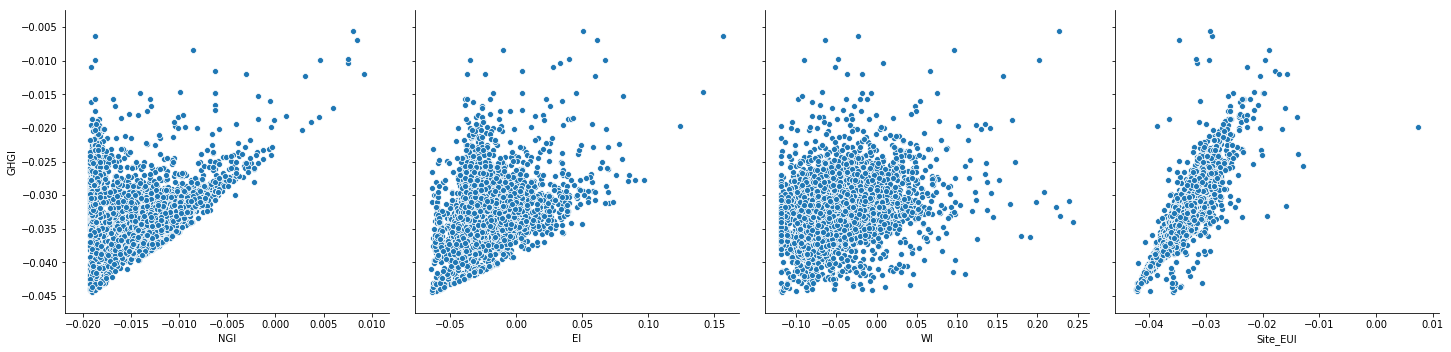

In [91]:
import seaborn as sns

sns.pairplot(df, 
             x_vars=['NGI','EI','WI','Site_EUI'], 
             y_vars='GHGI', 
             kind = 'scatter',
             height=5)

Let's now return to the linear regression modeling. Our goal is to approximate the target variable $y_i$ with a function $h_{\boldsymbol \theta}(\textbf{x}_{i})$. This function is a linear combination of our features,

\begin{equation}
h_{\boldsymbol \theta}(\textbf{x}_{i}) \, = \, \boldsymbol \theta^{T} \textbf{x}_{i} 
\end{equation}


We find the solution vector or coefficients $\boldsymbol \theta$ by minimizing the cost function $J \left( \boldsymbol \theta \right)$,


\begin{align}
\hat{\boldsymbol \theta}
 \; &= \; 
 \min_{\boldsymbol \theta} \, \frac{1}{2} \sum_{i=1}^{n} \left( y_{i}  -h_{\boldsymbol \theta}( \textbf{x}_{i}) \right)^{2} \\
&= \; 
 \min_{\boldsymbol \theta} \, \frac{1}{2} \Vert \textbf{y} - h_{\boldsymbol \theta}(\textbf{x}) \Vert^{2} \\
 &= \; 
 \min_{\boldsymbol \theta} \, J \left( \boldsymbol \theta \right)
\end{align}



Mininmizing $J \left( \boldsymbol \theta \right)$ is equivalent to setting the $\nabla J \left( \boldsymbol \theta \right) \; = \; 0$.  We can expand the cost function,

\begin{align}
J(\boldsymbol \theta ) 
\; &= \; 
\frac{1}{2} \, \Vert  \textbf{y} - \textbf{X} \boldsymbol \theta \Vert^{2} \\
&= \; 
 \min_{\boldsymbol \theta} \, \frac{1}{2} \Vert \textbf{y} - \textbf{X} \boldsymbol \theta \Vert^{2} \\
&= \; \frac{1}{2} \, \left( \textbf{y} - \textbf{X} \boldsymbol \theta \right)^{T}  \left( \textbf{y} - \textbf{X} \boldsymbol \theta  \right) \\
&= \; \frac{1}{2} \, \left( \textbf{y}^{T} \textbf{y}  - \textbf{y}^{T} \textbf{X} \boldsymbol \theta  - \boldsymbol \theta^{T} \textbf{X}^{T} \textbf{y} + \boldsymbol \theta^{T} \textbf{X}^{T} \textbf{X}  \boldsymbol \theta \right)
\end{align}


Taking the gradient of both sides we then have,

\begin{equation}
\boldsymbol \nabla J(\boldsymbol \theta ) 
\; = \;
\textbf{X}^{T} \left( \textbf{y} - \textbf{X} \boldsymbol \theta \right)
\end{equation}


Setting the above equal to zero yields the linear system of equations,


\begin{equation} 
\left(\textbf{X}^{T}\textbf{X}\right) \,
\hat{\boldsymbol \theta}
\; = \;
\textbf{X}^{T} \textbf{y} 
\end{equation}

The above formulation is the so-called **"Normal Equations"**.  We can rewrite them as, 

\begin{equation} 
S \,
\hat{\boldsymbol \theta}
\; = \;
\textbf{b}
\end{equation}

Where $\textbf{b} \, \in \mathbb{R}^{p}$ and $S \, = \, \textbf{X}^{T}\textbf{X} \, \in \mathbb{R}^{p \times p}$. When the features have been scaled (as we have assumed), the  matrix $S$ is the **covariance matrix** 

\begin{equation}
\left(\textbf{X}^{T}\textbf{X}\right)_{i,j} \; = \; \text{Cov}(x_{i},x_{j} )
\end{equation}

The vector $b \, = \, \textbf{X}^{T} \textbf{y} $ is a projection of the target values onto each of the features.  Defining the **residual, r** as,

\begin{equation}
\textbf{r} \; = \; \textbf{y} - \textbf{X} \boldsymbol \theta 
\end{equation}

Then we note $\nabla J \left( \hat{\boldsymbol \theta} \right) \; = \; 0$ is the same thing as saying,

\begin{equation}
X^{T} \, \textbf{r} \; = \; 0
\end{equation}

Or the solution $\hat{\boldsymbol \theta}$ is *value such that the residual is orthogonal to our feature space*.

The covariance matrix is symmetric and positive definite, but if the two features are highly correlated then two rows in the matrix will be nearly identical and the matrix will be nearly singular. Statistically, having correlated features bad since it makes it hard to determine the impact on any one feature has on the target. Numerically, having correlated features is bad because the condition number of the covariance matrix which defined as,

\begin{equation}
\kappa(S) \; = \; \Vert S \Vert_2 \, \Vert S^{-1} \Vert_2 \; = \; \frac{\sigma_{\text{min}}}{\sigma_{\text{max}}}
\end{equation}

explodes. We remark that the $\sigma$ are the singular values from the SVD. This affects not only the accuracy of your solution, but also the stability of the solvers.

There are two we will go over about solving the over-determined system of equations $X \boldsymbol \theta \, = \, \textbf{y}$:

1. Solving the Normal Equations using the Cholesky Decomposition

2. Solving the original linear system using the Singular Value Decomposition

### Linear Solver 1: Cholesky Decomposition Of Normal Equations

Since our covariance matrix $S$ is symmetrix positive definite we can use the [Cholesky decomposition](https://en.wikipedia.org/wiki/Cholesky_decomposition):

\begin{equation}
S = R^{T} R
\end{equation}

**where $R$ is an upper triangular matrix.** To solve the system of linear equations for linear regression then becomes,

\begin{align}
S \textbf{x} \; &= \; X^{T} \textbf{y} \\
R^{T}R \textbf{x} \; &= \; X^{T} \textbf{y}
\end{align}

Which we can rewrite as first solving,

\begin{equation}
R^{T} \textbf{w} \; = \; X^{T} \textbf{y}
\end{equation}

Then solve,

\begin{equation}
R \textbf{x} \; = \; \textbf{w}
\end{equation}

As $R$ is an upper triangular matrix each of these linear system of equations is simple to solve and the forward/backward substitutions made to solve them are backwards stable.

Let's try this out by first analyzing the covariance matrix

In [92]:
# Build the covariance matrix
X_t = X.transpose()
S = X_t.dot(X)

print("S = \n", S)

S = 
 [[ 0.99469872  1.8110829   3.71472944  2.2993486 ]
 [ 1.8110829   5.44075837  6.90849419  4.52746668]
 [ 3.71472944  6.90849419 22.16460794  8.95080936]
 [ 2.2993486   4.52746668  8.95080936  5.67422757]]


Let's take a look at the eigen values to understand the condititioning of our matrix

In [93]:
eigs = np.linalg.eigvals(S)
print(eigs)

[29.68953631  3.6324495   0.05293332  0.89937347]


In [113]:
cond_num = np.sqrt(eigs.min() / eigs.max())
print(f"Condition number = {cond_num}")

Condition number = 0.04222433942287341


The eigenvalues are all positive and the condition number is small which is good!

We will now be using many SciPy function calls. SciPy is a Python library that is sisters with Numpy that supports many scientific algorithms.  [SciPy's](https://docs.scipy.org/doc/scipy-0.16.1/reference/linalg.html) linear algebra routines expand on [NumPy's](https://docs.scipy.org/doc/numpy/reference/routines.linalg.html) and even allow for use sparse matrices and vectors. 

Let's now perform the Cholesky Decomposition using [SciPy](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.linalg.cho_solve.html): 

In [107]:
import scipy as sp

# Perform the Cholesky Factorization
R = sp.linalg.cho_factor(S, lower=False)

We can check to make sure that $R^T R \, = \, S$:

In [103]:
R.transpose().dot(R)

array([[ 23.36093883,  40.53589454,  35.16553422,   4.40092073],
       [ 40.53589454,  73.66600485,  67.31462564,   7.7869114 ],
       [ 35.16553422,  67.31462564, 102.28159609,  13.7774702 ],
       [  4.40092073,   7.7869114 ,  13.7774702 ,   5.67422757]])

Then use the matrix $R$ to solve the normal equations:

In [108]:
# solve for the coefficents
theta = sp.linalg.cho_solve(R, X_t.dot(Y))

print(f"theta : {theta}")

theta : [-0.21897599  0.03340623  0.01382607  1.01576187]


We can now get the predicted values from $\hat{y} \, = \, X \hat{\boldsymbol \theta}$ and plot the results against the true values:

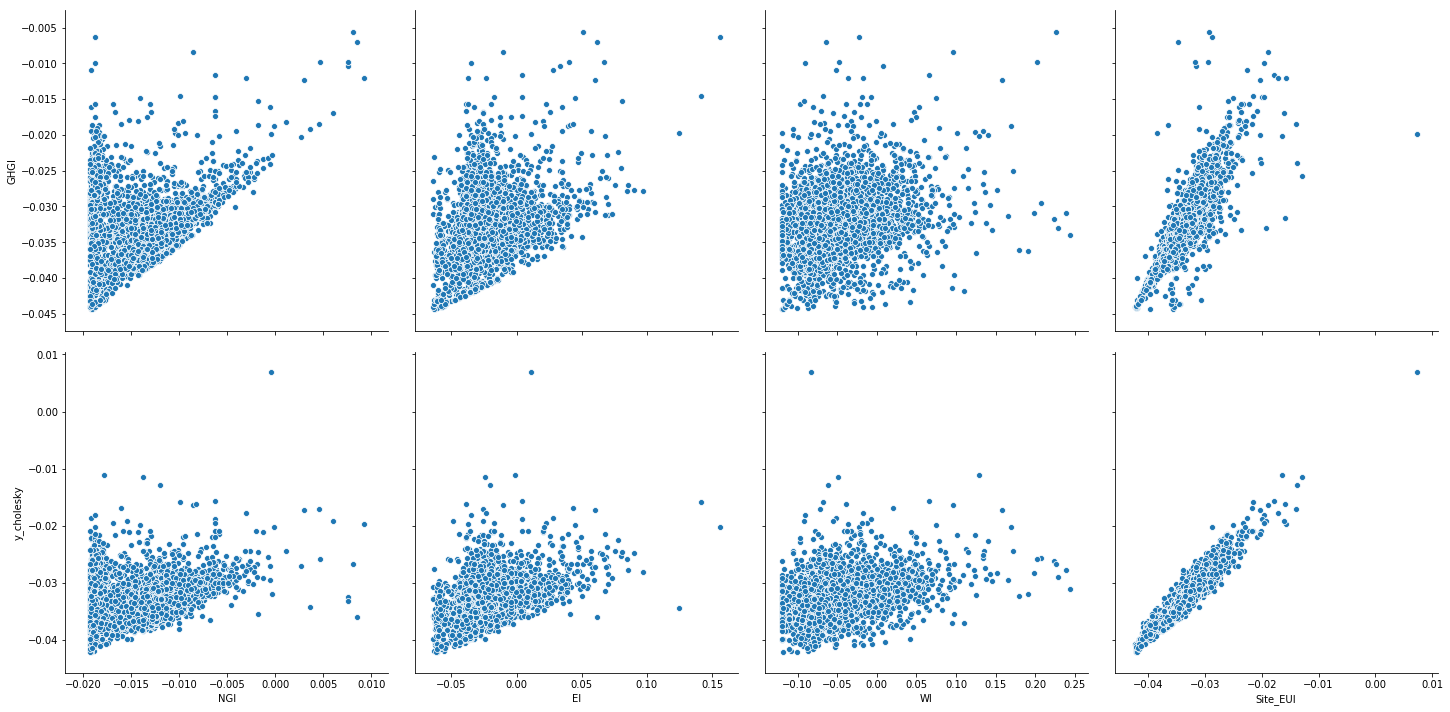

In [110]:
# Get the in sample predicted values
df["y_cholesky"] = X.dot(theta)

sns.pairplot(df,
             x_vars=['NGI','EI','WI','Site_EUI'], 
             y_vars=['GHGI','y_cholesky'],
             kind = 'scatter',
             height=5)

Not bad! Let's move onto solving the system of equations with the singular value decomposition.


## Linear Solver 2: The Singular Value Decomposition (SVD)

Let's solve the overdetermined system of equations,

\begin{equation}
X \, \boldsymbol \theta \; = \; y
\end{equation}

using the [Singular Value Decomposition (SVD)](https://en.wikipedia.org/wiki/Singular_value_decomposition):

\begin{equation}
X \; = \; U \Sigma V^{T}
\end{equation}

Where $U \, \in \mathbb{R}^{n \times n}$ and $V \, \in  \mathbb{R}^{p \times p}$ are [unitary matrices](https://en.wikipedia.org/wiki/Unitary_matrix) and $\Sigma \, \in \mathbb{R}^{n \times p}$ a diagonal matrix with the singular values along the diagonal.



\begin{align}
X \, \boldsymbol \theta \; &= \; y \\
U \Sigma V^{T} \boldsymbol \theta \; &= \; y \\
U^{T} U \Sigma V^{T} \boldsymbol \theta \; &= \; U^{T} \, y \\
\Sigma V^{T} \boldsymbol \theta \; &= \; U^{T} \, y
\end{align}

We then transform this to a system of equations:

\begin{equation}
\Sigma \textbf{w} \; = \; U^{T} \, y
\end{equation}

and 

\begin{equation}
V^{T} \boldsymbol \theta \; = \; \textbf{w}
\end{equation}

The last system of equation can be transformed using the identity $V^{T}V \, = \, I$:

\begin{equation}
\boldsymbol \theta \; = \; V \textbf{w}
\end{equation}

We can then solve the original system of equations $X \, \boldsymbol \theta \; = \; y$ by 

1. Finding the SVD $X \; = \; U \Sigma V^{T}$ then solve,

2. Inverting the diagonal matrix to solve $ \textbf{w} \; = \Sigma^{-1} \; U^{T} \, y$

3. Perform the matrix-vector multiplication: $\boldsymbol \theta \; = \; V \textbf{w}$


We can perform the SVD using [SciPy](https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.svd.html#scipy.linalg.svd):

In [160]:
U, Sig, Vt = sp.linalg.svd(X, full_matrices=False)

We can then look at the shapes of each of the resulting matrices:

In [148]:
U.shape, Sig.shape, Vt.shape

((4936, 4), (4,), (4, 4))

And then perform the steps described above to find $\boldsymbol \theta$,

In [158]:
w = (1 / Sig) * U.transpose().dot(y)

theta = Vt.transpose().dot(w)

print(f"theta : {theta}")

[-0.21897599  0.03340623  0.01382607  1.01576187]


They have the same solutions!

## Controling For Overfitting With Regularization
----------------------------
We can control for overfitting our model by using regularization of the form,

\begin{align}
J(\boldsymbol \theta )
 \; = \; 
 \frac{1}{2n} \sum_{i=1}^{n} \left( y_{i} -  h_{\boldsymbol \theta}(\textbf{x}_{i}) \right)^{2}   + \frac{\lambda}{q} \sum_{i=1}^{p} \vert \theta_{i} \vert^{q}
\end{align}

For $q=2$ this is called [Ridge Regression](https://en.wikipedia.org/wiki/Tikhonov_regularization) and for $q=1$ it is called [Lasso Regression](https://en.wikipedia.org/wiki/Lasso_(statistics)). Ridge Regression serves to control for over-fitting by shrinking the parameters $\theta_{i}$ as $\lambda$ increases.  Not all individual parameters must shrink as $\lambda$ increases, but in aggregate $\Vert \boldsymbol \theta \Vert^{2}_{\ell_2}$ decreases.  Ridge Regression implicitly assumes that all features influence the response, while Lasso regression performs feature selection and implicitly assumes that some of the coefficients $\theta_{i}$ will be zero. Lasso regression will outperform Ridge when a small number of the features contribute to the response, otherwise we can use [cross validation](https://en.wikipedia.org/wiki/Cross-validation_(statistics)) to find which method will perform better. Both methods seek to reduce the variance in model, and subsequently increase the bias.

**Note: In neither method do we consider penalizing the value $\theta_0$.**

In the case of Ridge Regression we can view the cost function as,

\begin{equation} \label{eq:VectorMSE}
\hat{\boldsymbol \theta}
 \; = \; 
 \min_{\boldsymbol \theta}  \Vert \textbf{X} \boldsymbol \theta - \textbf{y} \Vert^{2}  +  \lambda  \Vert \boldsymbol \theta \Vert^{2}
\end{equation} 

Which after expanding the values and setting the derivative to zero yields,

\begin{equation}
\hat{\boldsymbol \theta}
\; = \;
\left(\textbf{X}^{T}\textbf{X}  + \lambda I \right)^{-1}
 \left(\textbf{X}^{T} \textbf{y} \right)
\end{equation}

We can see that the regularization term acts to remove the singularity from the covariance matrix if there is correlation among features.  Using the SVD we arrive at:

\begin{align}
\left(\textbf{X}^{T}\textbf{X}  + \lambda I \right) \, \boldsymbol \theta
\; &= \;
 \left(\textbf{X}^{T} \textbf{y} \right) \\
\left( V^{T} \Sigma^{T} \Sigma V + \lambda I \right) \, \boldsymbol \theta 
\; &= \;
 \left(\textbf{V}^{T} \Sigma^{T} U \right) \, \textbf{y} \\
 V^{T} \left( \Sigma^{T} \Sigma   + \lambda I \right) V \, \boldsymbol \theta 
\; &= \;
\left(\textbf{V}^{T} \Sigma^{T} U \right) \, \textbf{y} \\
\left( \Sigma^{T} \Sigma  + \lambda I \right) V \, \boldsymbol \theta 
\; &= \; \Sigma^{T} U \, \textbf{y}
\end{align}
We can transform the last equation to the system of equations:


\begin{equation}
\left( \Sigma^{T} \Sigma + \lambda I \right) \textbf{w}
\; = \; \Sigma^{T} U \, \textbf{y}
\end{equation}

with the system corresponding equation $V \, \boldsymbol \theta \; = \; \textbf{w}$ which can be rewritten as the matrix-vector multiplication:

\begin{equation}
\boldsymbol \theta \; = \; V^{T} \textbf{w}
\end{equation}


The matrix, $\left( \Sigma^{T} \Sigma + \lambda I \right) \, \in \mathbb{R}^{p \times p}$ is diagonal and can be inverted by hand.  This gives us a way of solving the problem for Ridge Regression by combining the two equations:

1. Finding the SVD $X \; = \; U \Sigma V^{T}$ then solve

2. For each value of $\lambda \geq 0$:

    i. Inverting the matrix to obtain $ \textbf{w} \; = \; \left( \Sigma^{T} \Sigma  + \lambda I \right)^{-1} \, \Sigma^{T} \, U \, \textbf{y}$
    
    ii. Perform the matrix-vector multiplication $\hat{\boldsymbol \theta} \; = \; V^{T} \textbf{w}$
    
3. Choose the $\hat{\boldsymbol \theta}$ corresponding to the $\lambda$ that minimizes $\text{MSE}(\hat{\boldsymbol \theta}) \, = \, \frac{1}{2} \Vert \textbf{y} - X \hat{\boldsymbol \theta} \Vert_{2}^{2}$

We remark we can combine the i. and ii. to obtain the formula:

\begin{equation}
\hat{\boldsymbol \theta} \; = V^{T} \, \left( \Sigma^{T} \Sigma  + \lambda I \right)^{-1} \, \Sigma^{T} \, U \, \textbf{y}
\end{equation}

Then the matrix $D \, = \, \left( \Sigma^{T} \Sigma + \lambda I \right) \Sigma^{T} \, \in  \mathbb{R}^{p \times n}$ is a diagonal matrix with values along the diagonal taking the form,

\begin{equation}
D_{i,i} \; = \; \frac{\sigma_{i}}{\sigma_{i}^{2} + \lambda}
\end{equation}



## Scikit-Learn's Implementation 

The [Scikit-Learn](https://github.com/scikit-learn/scikit-learn/blob/1495f6924/sklearn/linear_model/base.py#L367) implementation utilizes Scipy's [least square solver](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.lstsq.html) if the matrix is dense calls [BLAS/LAPACK](https://github.com/numpy/numpy/blob/master/numpy/linalg/umath_linalg.c.src#L3167).  If the matrix $X$ is sparse then it calls SciPy's [sparse least squares solver](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.lstsq.html) which uses least squres with QR factorization [LSQR](https://github.com/scipy/scipy/blob/v1.3.2/scipy/sparse/linalg/isolve/lsqr.py#L98-L570)

## Recommendation Systems: Alternating Least Squares
------------------------------------

http://www.mattmoocar.me/recsys/

https://medium.com/radon-dev/als-implicit-collaborative-filtering-5ed653ba39fe